IRIS FLOWER CLASSIFICATION USING THE KNN_CLASSIFIER

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [9]:
def train_knn_classifier(X, y, n_neighbors=3):
    # Feature scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize K-Nearest Neighbors classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Train the classifier
    knn.fit(X_scaled, y)

    return knn

In [10]:
def visualize_decision_boundaries(X, y, classifier):
    h = .02  # Step size in the mesh

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Decision boundaries')
    plt.show()

In [11]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN classifier
knn_classifier = train_knn_classifier(X_train, y_train)

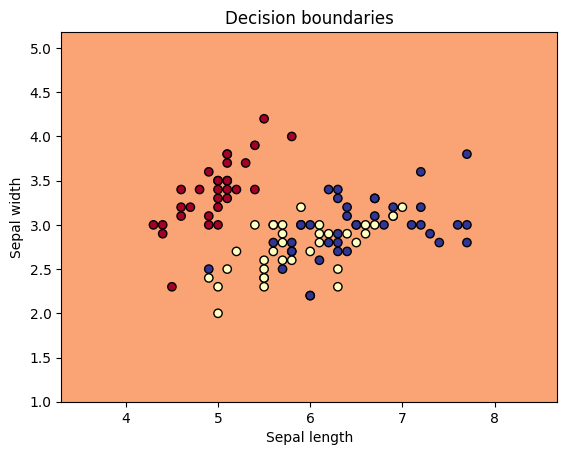

Accuracy: 0.7777777777777778


In [12]:
# Visualize decision boundaries
visualize_decision_boundaries(X_train, y_train, knn_classifier)

# Test the model
X_test_scaled = StandardScaler().fit_transform(X_test)
y_pred = knn_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)